In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report ,confusion_matrix

In [4]:
# feed input data to train and test
base_dir = '/Users/miteshwandhare/Downloads/data/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

# make dir for train,test and validation data
os.makedirs(train_dir, exist_ok = True)
os.makedirs(test_dir, exist_ok = True)
os.makedirs(validation_dir, exist_ok = True)

# defining subdirectories like laminar and turbulent in all train,test and validation dir
classes = ['laminar','turbulent']

def split_data (class_name):
    class_dir = os.path.join(base_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True) 
    fnames = os.listdir(class_dir)
    # Split data now
    train_size = int(0.7*len(fnames))
    test_size = int(0.15*len(fnames))
    validation_size = len(fnames) - train_size - test_size
    train_files = fnames[:train_size]
    test_files = fnames[train_size:test_size + train_size]
    validation_files = fnames[test_size + train_size :]


    for fnames in train_files :
        src = os.path.join(class_dir, fnames)
        dst = os.path.join(train_class_dir,fnames)
        shutil.copy(src,dst)

    for fnames in test_files :
        src = os.path.join(class_dir, fnames)
        dst = os.path.join(test_class_dir,fnames)
        shutil.copy(src,dst)
        
    for fnames in validation_files :
        src = os.path.join(class_dir, fnames)
        dst = os.path.join(validation_class_dir,fnames)
        shutil.copy(src,dst)


for class_name in classes:
    split_data(class_name)
    



In [5]:
# ensuring if the data is divided 
def count_files(directory):
    count = sum([len(files) for _, _, files in os.walk(directory)])
    return count

for class_name in classes:
    train_class_dir = os.path.join(train_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    train_count = count_files(train_class_dir)
    validation_count = count_files(validation_class_dir)
    test_count = count_files(test_class_dir)
    
    print(f'Class: {class_name}')
    print(f'Train images: {train_count}')
    print(f'Validation images: {validation_count}')
    print(f'Test images: {test_count}')
    print('---------------------------')

Class: laminar
Train images: 95
Validation images: 22
Test images: 20
---------------------------
Class: turbulent
Train images: 107
Validation images: 24
Test images: 23
---------------------------


In [6]:
# implementing the LENET-5 (1988) Model
def LeNet5(input_shape, num_classes):
    model = Sequential([
        # C1 Convolutional Layer 1: 
        Conv2D(6,kernel_size = (5,5), activation = 'relu', input_shape = input_shape),
        # A1: Average pooling layer 1:
        AveragePooling2D(pool_size = (2,2), strides = (2,2)),
        # C2 Convolutional Layer 2: 
        Conv2D(16, kernel_size = (5,5), activation = 'relu'),
        # A2: Average pooling layer 2:
        AveragePooling2D(pool_size = (2,2), strides = (2,2)),
        # C3 Convolutional Layer 3: 
        Conv2D(120, kernel_size = (5,5), activation = 'relu'),
        Flatten(),
        Dense(120,activation = 'relu'),
        Dense(84,activation = 'relu'),
        Dense(num_classes, activation = 'softmax')
    ])
    return model



In [7]:
train_dir = '/Users/miteshwandhare/Downloads/data/train'
test_dir = '/Users/miteshwandhare/Downloads/data/test'
validation_dir = '/Users/miteshwandhare/Downloads/data/validation'

# first let's define input shape
input_shape = (32,32,3)

# number of classes : classes in which data is to be classified
num_classes = 2  #Laminar and Turbulent

model = LeNet5(input_shape,num_classes)

# Data preprocessing 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'
)

# compile the model
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

model.summary()

# train the model
model.fit(train_generator, 
          epochs = 64, 
          validation_data = validation_generator)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'  
)


# evaluate the model
test_loss, accuracy = model.evaluate(test_generator)
    


Found 202 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 1, 120)         48120     
                                         

Epoch 1/64
7/7 [==============================] - 1s 182ms/step - loss: 0.2054 - accuracy: 0.9109 - val_loss: 0.2406 - val_accuracy: 0.8913
Epoch 2/64
7/7 [==============================] - 1s 162ms/step - loss: 0.2533 - accuracy: 0.8812 - val_loss: 0.4258 - val_accuracy: 0.8478
Epoch 3/64
7/7 [==============================] - 1s 184ms/step - loss: 0.1870 - accuracy: 0.9406 - val_loss: 0.4023 - val_accuracy: 0.8696
Epoch 4/64
7/7 [==============================] - 1s 134ms/step - loss: 0.1602 - accuracy: 0.9257 - val_loss: 0.4065 - val_accuracy: 0.8043
Epoch 5/64
7/7 [==============================] - 1s 144ms/step - loss: 0.1122 - accuracy: 0.9653 - val_loss: 0.3724 - val_accuracy: 0.8261
Epoch 6/64
7/7 [==============================] - 1s 145ms/step - loss: 0.1123 - accuracy: 0.9604 - val_loss: 0.4199 - val_accuracy: 0.8478
Epoch 7/64
7/7 [==============================] - 1s 148ms/step - loss: 0.1251 - accuracy: 0.9604 - val_loss: 0.4068 - val_accuracy: 0.8696
Epoch 8/64
7/7 [====

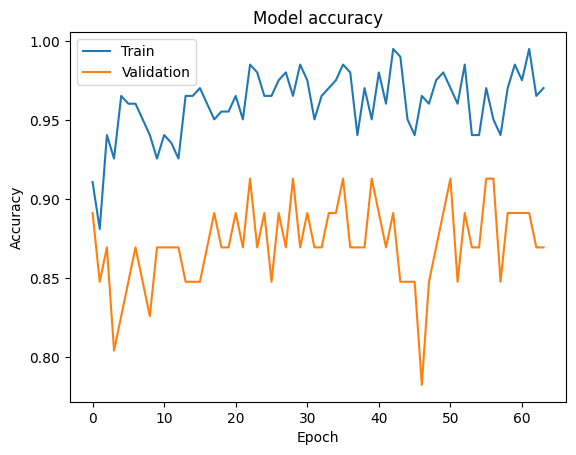

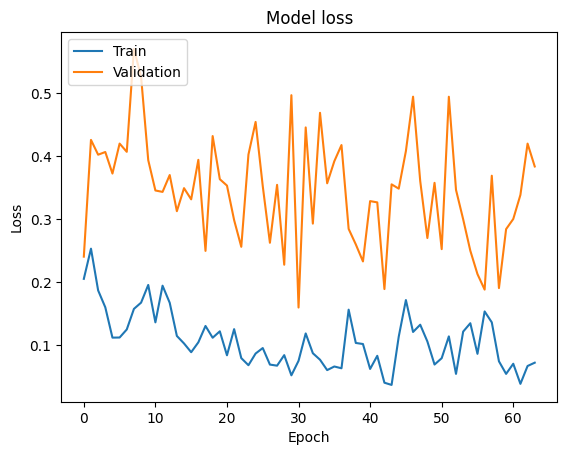

In [59]:
# Train the model
history = model.fit(
    train_generator, 
    epochs=64, 
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [65]:
# AlexNet model(2012)
def AlexNet(input_shape, num_classes):
    model = Sequential([
        # C1 Convolutional Layer 1: 
        Conv2D(96,kernel_size = (11,11),strides = (4,4), activation = 'relu', input_shape = input_shape),
        # M1: Max pooling layer 1:
        MaxPooling2D(pool_size = (3,3), strides = (2,2)),
        # C2 Convolutional Layer 2: 
        Conv2D(256, kernel_size = (5,5),padding = 'same', activation = 'relu'),
        # A2: Max pooling layer 2:
        MaxPooling2D(pool_size = (3,3), strides = (2,2)),
        # C3 Convolutional Layer 3: 
        Conv2D(384, kernel_size = (3,3),padding = 'same', activation = 'relu'),
        # C4 Convolutional Layer 4: 
        Conv2D(384, kernel_size = (3,3),padding = 'same', activation = 'relu'),
        # C5 Convolutional Layer 5: 
        Conv2D(256, kernel_size = (3,3),padding = 'same', activation = 'relu'),
        # M3: Max pooling layer 3:
        MaxPooling2D(pool_size = (3,3), strides = (2,2)),
        Flatten(),
        Dense(4096,activation = 'relu'),
        Dropout(0.5),
        Dense(4096,activation = 'relu'),
        Dropout(0.5),
        Dense(num_classes, activation = 'softmax')
    ])
    return model


In [73]:
# Define input shape and number of classes
input_shape = (227, 227, 3)  # Input shape according to AlexNet specifications
num_classes = 2  # Number of classes (Laminar and Turbulent)

# Create AlexNet model
alexnet_model = AlexNet(input_shape, num_classes)

# Print model summary
alexnet_model.summary()

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = alexnet_model.fit(
    train_generator,
    epochs=32,
    validation_data=validation_generator
)

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = alexnet_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_190 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 27, 27, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_191 (Conv2D)         (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 13, 13, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_192 (Conv2D)         (None, 13, 13, 384)       885120    
                                                                 
 conv2d_193 (Conv2D)         (None, 13, 13, 384)     

In [69]:
# ZFNEt
def ZFNet(input_shape, num_classes):
    model = Sequential([
        # C1 Convolutional Layer 1: 
        Conv2D(96,kernel_size = (7,7),strides = (2,2), activation = 'relu', input_shape = input_shape),
        # M1: Max pooling layer 1:
        MaxPooling2D(pool_size = (3,3), strides = (2,2)),
        # C2 Convolutional Layer 2: 
        Conv2D(256, kernel_size = (3,3),strides = (2,2), activation = 'relu'),
        # A2: Max pooling layer 2:
        MaxPooling2D(pool_size = (3,3), strides = (2,2)),
        # C3 Convolutional Layer 3: 
        Conv2D(384, kernel_size = (3,3),padding = 'same', activation = 'relu'),
        # C4 Convolutional Layer 4: 
        Conv2D(384, kernel_size = (3,3),padding = 'same', activation = 'relu'),
        # C5 Convolutional Layer 5: 
        Conv2D(256, kernel_size = (3,3),padding = 'same', activation = 'relu'),
        # M3: Max pooling layer 3:
        MaxPooling2D(pool_size = (3,3), strides = (2,2)),
        Flatten(),
        Dense(4096,activation = 'relu'),
        Dropout(0.5),
        Dense(4096,activation = 'relu'),
        Dropout(0.5),
        Dense(num_classes, activation = 'softmax')
    ])
    return model


In [70]:
# Define input shape and number of classes
input_shape = (224, 224, 3)  # Input shape according to AlexNet specifications
num_classes = 2  # Number of classes (Laminar and Turbulent)

# Create ZFNet model
ZFnet_model = ZFNet(input_shape, num_classes)

# Print model summary
ZFnet_model.summary()

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Compile the model
ZFnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = ZFnet_model.fit(
    train_generator,
    epochs=32,
    validation_data=validation_generator
)

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = ZFnet_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 109, 109, 96)      14208     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 54, 54, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_72 (Conv2D)          (None, 26, 26, 256)       221440    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 conv2d_74 (Conv2D)          (None, 12, 12, 384)     

In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), activation='relu', padding='same')(x)
    
    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), activation='relu', padding='same')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), activation='relu', padding='same')(branch3x3)
    
    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), activation='relu', padding='same')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), activation='relu', padding='same')(branch5x5)
    
    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), activation='relu', padding='same')(branch_pool)
    
    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

def GoogLeNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    x = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
    x = Conv2D(filters=192, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, filters=[192, 96, 208, 16, 48, 64])
    x = inception_module(x, filters=[160, 112, 224, 24, 64, 64])
    x = inception_module(x, filters=[128, 128, 256, 24, 64, 64])
    x = inception_module(x, filters=[112, 144, 288, 32, 64, 64])
    x = inception_module(x, filters=[256, 160, 320, 32, 128, 128])
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, filters=[256, 160, 320, 32, 128, 128])
    x = inception_module(x, filters=[384, 192, 384, 48, 128, 128])
    x = AveragePooling2D(pool_size=(7, 7), strides=(1, 1), padding='valid')(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)
    x = Dense(units=num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model

# Define data directories
train_dir = '/Users/miteshwandhare/Downloads/data/train'
test_dir = '/Users/miteshwandhare/Downloads/data/test'
validation_dir = '/Users/miteshwandhare/Downloads/data/validation'

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Input shape according to GoogLeNet specifications
num_classes = 2  # Number of classes (Laminar and Turbulent)

# Create GoogLeNet model
googlenet_model = GoogLeNet(input_shape, num_classes)
googlenet_model.summary()

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Compile the model
googlenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = googlenet_model.fit(
    train_generator,
    epochs=32,
    validation_data=validation_generator
)

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = googlenet_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_252 (Conv2D)         (None, 112, 112, 64)         9472      ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_62 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_252[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 conv2d_253 (Conv2D)         (None, 56, 56, 64)           4160      ['max_pooling2d_62[0][0]

Epoch 1/32
7/7 [==============================] - 26s 3s/step - loss: 0.7584 - accuracy: 0.5495 - val_loss: 0.6931 - val_accuracy: 0.5217
Epoch 2/32
7/7 [==============================] - 20s 3s/step - loss: 0.6932 - accuracy: 0.5297 - val_loss: 0.6923 - val_accuracy: 0.5217
Epoch 3/32
7/7 [==============================] - 21s 3s/step - loss: 0.6929 - accuracy: 0.5297 - val_loss: 0.6925 - val_accuracy: 0.5217
Epoch 4/32
7/7 [==============================] - 24s 3s/step - loss: 0.6916 - accuracy: 0.5297 - val_loss: 0.6922 - val_accuracy: 0.5217
Epoch 5/32
7/7 [==============================] - 24s 3s/step - loss: 0.6920 - accuracy: 0.5297 - val_loss: 0.6922 - val_accuracy: 0.5217
Epoch 6/32
7/7 [==============================] - 22s 3s/step - loss: 0.6913 - accuracy: 0.5297 - val_loss: 0.6922 - val_accuracy: 0.5217
Epoch 7/32
7/7 [==============================] - 22s 3s/step - loss: 0.6914 - accuracy: 0.5297 - val_loss: 0.6922 - val_accuracy: 0.5217
Epoch 8/32
7/7 [==================

In [81]:
# VGGNet there are two models VGG-16 and VGG-19 we are using VGG-16 here
def VGGNet(input_shape,num_classes):
    model = Sequential([
        Conv2D(64,kernel_size = (3,3),padding = 'same', activation = 'relu', input_shape = input_shape),
        Conv2D(64,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        MaxPooling2D(pool_size = (2,2),strides = (2,2)), # Layer 1
        Conv2D(128,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        Conv2D(128,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        MaxPooling2D(pool_size = (2,2),strides = (2,2)), # Layer 2
        Conv2D(256,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        Conv2D(256,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        Conv2D(256,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        MaxPooling2D(pool_size = (2,2),strides = (2,2)), # Layer 3
        Conv2D(512,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        Conv2D(512,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        Conv2D(512,kernel_size = (3,3),padding = 'same', activation = 'relu'), 
        MaxPooling2D(pool_size = (2,2),strides = (2,2)), # Layer 4
        Conv2D(512,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        Conv2D(512,kernel_size = (3,3),padding = 'same', activation = 'relu'),
        Conv2D(512,kernel_size = (3,3),padding = 'same', activation = 'relu'), 
        MaxPooling2D(pool_size = (2,2),strides = (2,2)), # Layer 5
        Flatten(),
        Dense(4096, activation = 'relu'),
        Dense(4096, activation = 'relu'),
        Dense(num_classes , activation = 'relu')
        
    ])
    return model

input_shape = (224, 224, 3)  # Input shape according to VGGNet specifications
num_classes = 2  # Number of classes (Laminar and Turbulent)

vgg_model = VGGNet(input_shape,num_classes)
vgg_model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

vgg_model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = vgg_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = vgg_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_324 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_325 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_326 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_327 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                               

Epoch 1/10
7/7 [==============================] - 189s 26s/step - loss: nan - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.4783
Epoch 2/10
7/7 [==============================] - 181s 26s/step - loss: nan - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.4783
Epoch 3/10
7/7 [==============================] - 203s 32s/step - loss: nan - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.4783
Epoch 4/10
7/7 [==============================] - 196s 31s/step - loss: nan - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.4783
Epoch 5/10
7/7 [==============================] - 270s 43s/step - loss: nan - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.4783
Epoch 6/10
7/7 [==============================] - 324s 43s/step - loss: nan - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.4783
Epoch 7/10
7/7 [==============================] - 266s 42s/step - loss: nan - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.4783
Epoch 8/10
7/7 [==============================] - 239s 34s/ste

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Input shape according to ResNet50 specifications
num_classes = 2  # Number of classes (Laminar and Turbulent)

resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


NameError: name 'layers' is not defined

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Skip connection
    if strides != (1, 1) or input_tensor.shape[-1] != filters:
        input_tensor = Conv2D(filters, (1, 1), strides=strides)(input_tensor)
    x = Add()([x, input_tensor])
    x = Activation(activation)(x)
    return x

def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    
    x = residual_block(x, 128, strides=(2, 2))
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    
    x = residual_block(x, 256, strides=(2, 2))
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model


# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create ResNet model
model = ResNet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)




Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 112, 112, 64)         9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_38 (Ba  (None, 112, 112, 64)         256       ['conv2d_45[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_38 (Activation)  (None, 112, 112, 64)         0         ['batch_normalization_38